# Statistical tests

## Nodal interactions

The In-Out-In+Out degrees tables were saved as Excel files, and are called here to compute statistical analyses

In [1]:
import numpy as np
import pandas as pd

# flow degrees
fd_cn = pd.read_excel('In-Out Degrees/fd CN.xlsx', header=0, index_col=0)
fd_ad1 = pd.read_excel('In-Out Degrees/fd AD1.xlsx', header=0, index_col=0)
fd_ad2 = pd.read_excel('In-Out Degrees/fd AD2.xlsx', header=0, index_col=0)
fd_ad3 = pd.read_excel('In-Out Degrees/fd AD3.xlsx', header=0, index_col=0)
fd_ad4 = pd.read_excel('In-Out Degrees/fd AD4.xlsx', header=0, index_col=0)

We want to determine if there are significant differences in means across the four groups, with one group serving as the control. We first check if the data is normally distributed with the Shapiro-Wilk test. If the data is not normally distributed different tests must be considered.

Shapiro-Wilk test for normality:
Group 1: ShapiroResult(statistic=0.8592751622200012, pvalue=0.07482105493545532)
Group 2: ShapiroResult(statistic=0.7262388467788696, pvalue=0.0018339548259973526)
Group 3: ShapiroResult(statistic=0.9646364450454712, pvalue=0.8371580243110657)
Group 4: ShapiroResult(statistic=0.8116170167922974, pvalue=0.020060408860445023)
Group 5: ShapiroResult(statistic=0.8710182905197144, pvalue=0.10273387283086777)


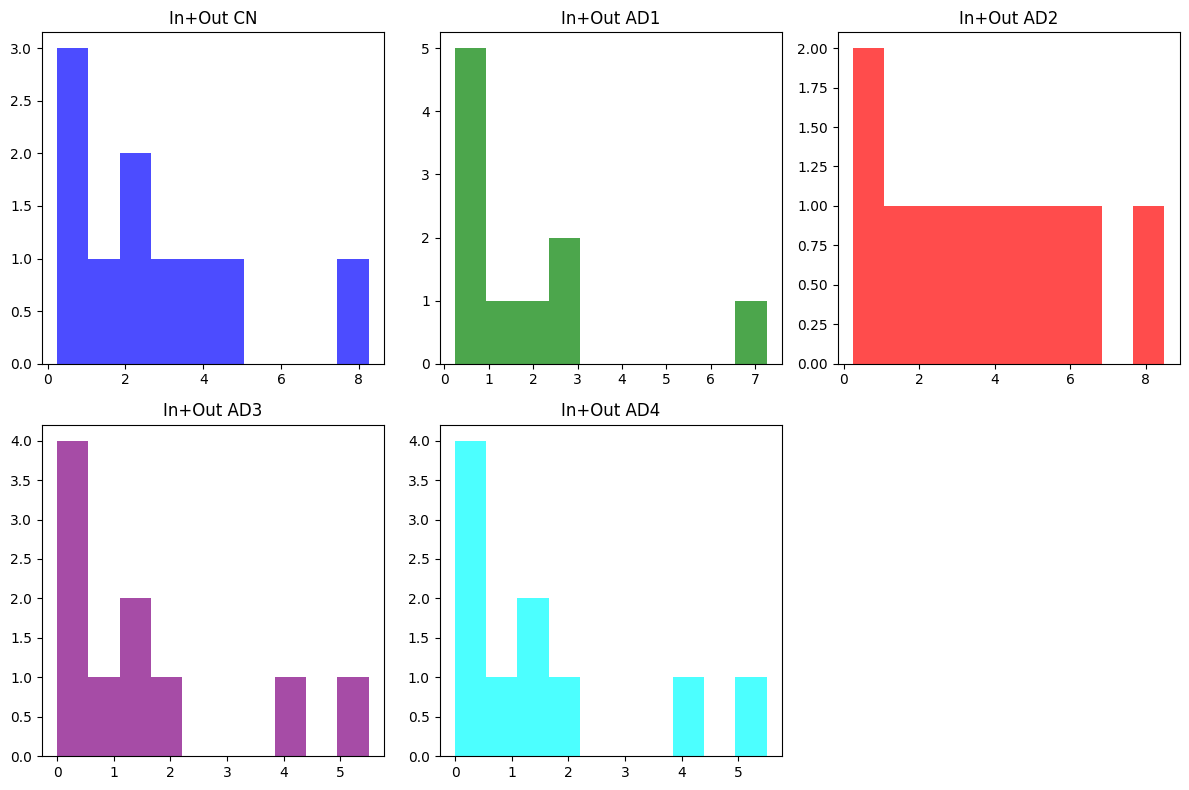

In [2]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt

group1 = fd_cn.values[2]
group2 = fd_ad1.values[2]
group3 = fd_ad2.values[2]
group4 = fd_ad3.values[2]
group5 = fd_ad4.values[2]

# Check normality using Shapiro-Wilk test
print("Shapiro-Wilk test for normality:")
print("Group 1:", stats.shapiro(group1))
print("Group 2:", stats.shapiro(group2))
print("Group 3:", stats.shapiro(group3))
print("Group 4:", stats.shapiro(group4))
print("Group 5:", stats.shapiro(group5))

# Plotting values
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
plt.hist(group1, bins=10, color='blue', alpha=0.7)
plt.title('In+Out CN')

plt.subplot(2, 3, 2)
plt.hist(group2, bins=10, color='green', alpha=0.7)
plt.title('In+Out AD1')

plt.subplot(2, 3, 3)
plt.hist(group3, bins=10, color='red', alpha=0.7)
plt.title('In+Out AD2')

plt.subplot(2, 3, 4)
plt.hist(group4, bins=10, color='purple', alpha=0.7)
plt.title('In+Out AD3')

plt.subplot(2, 3, 5)
plt.hist(group4, bins=10, color='cyan', alpha=0.7)
plt.title('In+Out AD4')

plt.tight_layout()
plt.show()


Seems like AD1 and AD3 are not normally distributed. Let's look at the Q-Q plots.

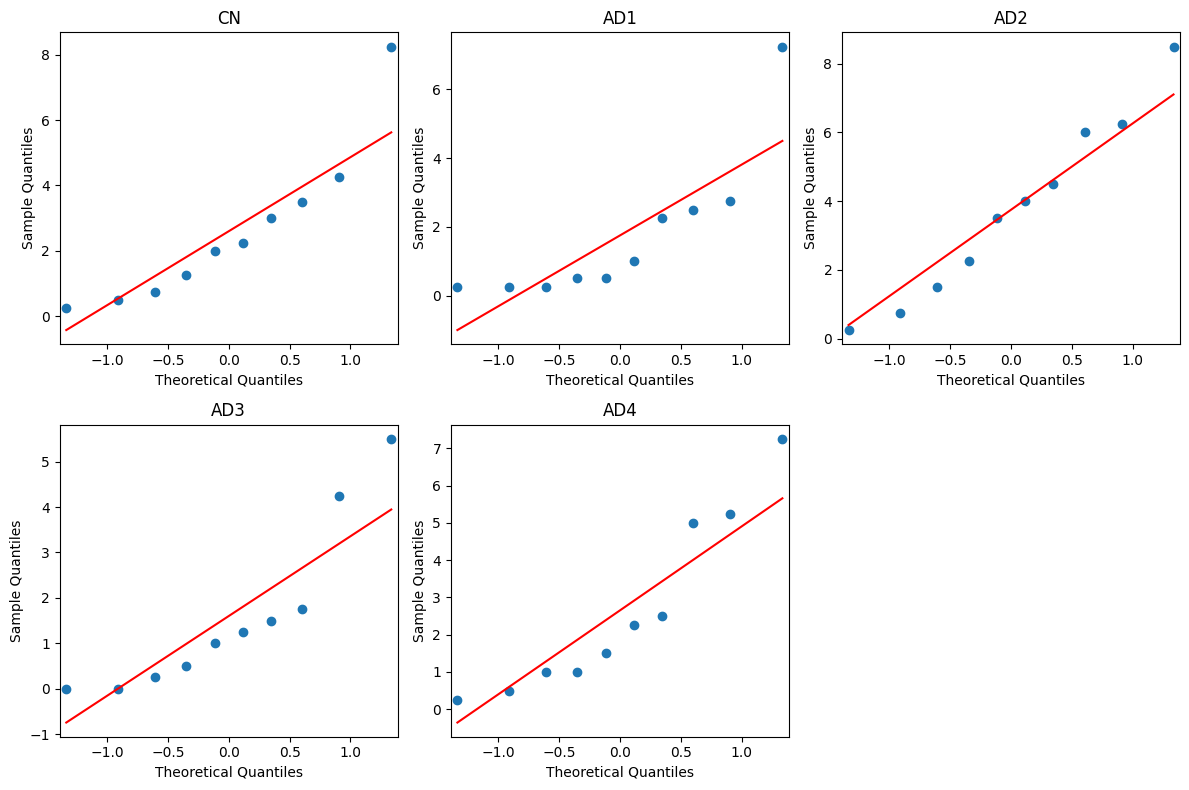

In [3]:
# Q-Q plots
plt.figure(figsize=(12, 8))
plt.subplot(2, 3, 1)
sm.qqplot(group1, line='s', ax=plt.gca())
plt.title('CN')

plt.subplot(2, 3, 2)
sm.qqplot(group2, line='s', ax=plt.gca())
plt.title('AD1')

plt.subplot(2, 3, 3)
sm.qqplot(group3, line='s', ax=plt.gca())
plt.title('AD2')

plt.subplot(2, 3, 4)
sm.qqplot(group4, line='s', ax=plt.gca())
plt.title('AD3')

plt.subplot(2, 3, 5)
sm.qqplot(group5, line='s', ax=plt.gca())
plt.title('AD4')

plt.tight_layout()
plt.show()


The pattern persists, but the sample size is small on all groups (10 RSNs). Let's use Levene's test for homogeneity of variances. 

In [4]:
from scipy.stats import levene

statistic, p_value = levene(group1, group2, group3, group4, group5)

print("Levene's test statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Variances are not equal across groups.")
else:
    print("Fail to reject the null hypothesis: Variances are equal across groups.")


Levene's test statistic: 0.4185610986838685
p-value: 0.7943705343214587
Fail to reject the null hypothesis: Variances are equal across groups.


Since the variances are equal across groups, we are satisfying one of the assumptions of ANOVA, so we use it.

In [5]:
from scipy.stats import f_oneway

statistic, p_value = f_oneway(group1, group2, group3, group4, group5)

print("ANOVA F-statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in means across groups.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in means across groups.")


ANOVA F-statistic: 1.3972021376925494
p-value: 0.25023347520980777
Fail to reject the null hypothesis: There are no significant differences in means across groups.


This result could be skewed since two of our groups are not normally distributed and the sample size is small. Let's try with a non-parametric Kruskal-Wallis test to confirm this result.

In [6]:
from scipy.stats import kruskal

statistic, p_value = kruskal(group1, group2, group3, group4, group5)

print("Kruskal-Wallis test statistic:", statistic)
print("p-value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences in medians across groups.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences in medians across groups.")


Kruskal-Wallis test statistic: 6.0205811371753954
p-value: 0.1976165249451769
Fail to reject the null hypothesis: There are no significant differences in medians across groups.


From here, we conclude that there is no evidence for the hypothesis that the means of the groups are actually different.

## dDTF matrices

Our hypothesis is that there are differences in the connectivity between the dDTF matrices of the AD groups when compared to Control. We call the dDTF matrices as they were stored in an Excel file. We compute the mean, variance, median, and covariance of the dDTF matrices across groups, compute summary statistics, and apply the Kruskal-Wallis test.

In [8]:
matrix_cn = pd.read_excel('dDTFs/dDTF CN.xlsx', header=0, index_col=0)
matrix_ad1 = pd.read_excel('dDTFs/dDTF AD1.xlsx', header=0, index_col=0)
matrix_ad2 = pd.read_excel('dDTFs/dDTF AD2.xlsx', header=0, index_col=0)
matrix_ad3 = pd.read_excel('dDTFs/dDTF AD3.xlsx', header=0, index_col=0)
matrix_ad4 = pd.read_excel('dDTFs/dDTF AD4.xlsx', header=0, index_col=0)

In [9]:
from scipy.stats import kruskal
import numpy as np

def compute_summary_statistics(matrices):
    means = np.mean(matrices, axis=(0, 1))
    variances = np.var(matrices, axis=(0, 1))
    medians = np.median(matrices, axis=(0, 1))
    covariances = np.cov(matrices.reshape(len(matrices), -1).T)
    return means, variances, medians, covariances

# Compute summary statistics for each group
cn_mean, cn_var, cn_median, cn_cov = compute_summary_statistics(matrix_cn.values)
ad1_mean, ad1_var, ad1_median, ad1_cov = compute_summary_statistics(matrix_ad1.values)
ad2_mean, ad2_var, ad2_median, ad2_cov = compute_summary_statistics(matrix_ad2.values)
ad3_mean, ad3_var, ad3_median, ad3_cov = compute_summary_statistics(matrix_ad3.values)
ad5_mean, ad5_var, ad5_median, ad5_cov = compute_summary_statistics(matrix_ad4.values)

# Combine summary statistics across groups
all_means = [cn_mean, ad1_mean, ad2_mean, ad3_mean, ad5_mean]
all_vars = [cn_var, ad1_var, ad2_var, ad3_var, ad5_var]
all_medians = [cn_median, ad1_median, ad2_median, ad3_median, ad5_median]
all_covs = [cn_cov, ad1_cov, ad2_cov, ad3_cov, ad5_cov]

# Perform Kruskal-Wallis test for each summary statistic
for summary_statistic, name in zip([all_means, all_vars, all_medians, all_covs], ['Mean', 'Variance', 'Median', 'Covariance']):
    statistic, p_value = kruskal(*summary_statistic)
    print(f"Kruskal-Wallis Test for {name}:")
    print("Test Statistic:", statistic)
    print("p-value:", p_value)


Kruskal-Wallis Test for Mean:
Test Statistic: 4.0
p-value: 0.40600584970983794
Kruskal-Wallis Test for Variance:
Test Statistic: 4.0
p-value: 0.40600584970983794
Kruskal-Wallis Test for Median:
Test Statistic: 4.0
p-value: 0.40600584970983794
Kruskal-Wallis Test for Covariance:
Test Statistic: [26.97788235 31.92470588 33.02682353 30.89694118 38.36235294 25.42211765
 33.65647059 25.86541176 25.31764706 26.35670588]
p-value: [2.00846343e-05 1.98209422e-06 1.17947069e-06 3.21321653e-06
 9.43338116e-08 4.13740741e-05 8.76392453e-07 3.36846988e-05
 4.34266259e-05 2.68126550e-05]


We can conclude that the covariances of the matrices give us sufficient evidence that the matrices come from different groups.